In [21]:
# import sys, datetime
import serial.tools.list_ports
import matplotlib.pyplot as plt

In [24]:
ports = serial.tools.list_ports.comports()
port = None
# print(ports)
for port in ports:
    # print(f"{port}")
    print(f"Порт: {port.device}")
    # print(f"Описание: {port.description}")
    # print(f"VID:PID: {port.vid}:{port.pid}")

if port:
    port = port.device

Порт: COM5


In [25]:
with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=3)) as serialData:
    # Read data from COM port
    command = 'R'

    # Send the command to the DataPort
    serialData.write(command.encode(encoding="utf-8"))
    # serialData.flush()

In [26]:
line = None

with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=3)) as serialData:
    # Read data from COM port
    command = 'S'

    # Send the command to the DataPort
    serialData.write(command.encode())
    
    line = serialData.read(262144)
    # line = serialData.read(30)
    # line = serialData.readline()
    # line = serialData.read_all()
    # line = serialData.read_until(',')
    # lines = serialData.readlines()

In [7]:
line

b"'\x82+\xa6,\x83+\xa8,\x82+\xc3,\x85+\xac,\x83+\xa4,\x83+\xa5,\x85+\xa9,\x84+\xa4,\x82+\xa3,\x84+\xa2,\x83+\xa5,\x84+\xab,\x84+\xa3,g+\x93,\x85+\xa4,\x82+\xa2,\x83+\x8e,\x82+\x8d,\x85+\xa4,\x83+\xa4,\x83+\x8f,\x85+\x8f,\x84+\xa2,\x82+\xa3,\x84+\xa2,\x83+\x8f,\x84+\xa3,\x84+\xa5,\x85+\x91,\x85+\x8e,\x82+\xa2,\x83+\xa4,\x82+\x91,\x85+\x8e,\x83+\x8e,\x83+\x8f,\x85+\x8f,\x84+\xa2,\x82+\xa5,\x84+\x8c,\x83+\x91,\x84+\xa3,\x84+\xa3,\x85+\x91,\x85+\x8e,\x82+\x90,\x83+\x8e,\x82+\x8d,\x85+\x90,\x83+\xa4,\x83+\x8f,\x85+\x93,\x84+\xa4,\x82+\xa3,\x84+\xa2,\x83+\xa5,\x84+\xa5,\x84+\xa3,\x85+\x8d,\x85+\x92,\x82+\xa6,\x83+\xa4,\x82+\x91,\x85+\x8e,\x83+\x8e,\x83+\xa5,\x85+\xa9,\x84+\xa2,\x82+\x91,\x84+\xa2,\x83+\x93,\x84+\xa3,\x84+\xa7,\x85+\x8f,\x85+\xa4,\x82+\xa2,\x83+\xa4,\x82+\x8d,\x85+\xa4,\x83+\x8e,\x83+\x8d,\x85+\x93,\x84+\xa2,\x82+\xa5,\x84+\xa6,\x83+\x91,\x84+\x8d,\x84+\x8d,\x85+\xa5,\x85+\xac,\x82+\xa2,\x83+\x8e,\x82+\xa3,\x85+\xa6,\x83+\x8e,\x83+\x8d,\x85+\xa5,\x84+\xa6,\x82+\x8d,\x84+\xa2,

In [8]:
intlist = [byte for byte in line]
intlist[:17]

[39, 130, 43, 166, 44, 131, 43, 168, 44, 130, 43, 195, 44, 133, 43, 172, 44]

In [11]:
intline = []
is_hi = True
for byte in line:
    if is_hi:
        is_hi = False
        hi = (byte-256) if byte > 127 else byte
    else:
        is_hi = True
        lo = byte
        intnum = hi*256 + lo
        intline.append(intnum)

intline[:10]

[10114, 11174, 11395, 11176, 11394, 11203, 11397, 11180, 11395, 11172]

In [27]:
intline = []
for num in range(0, len(line), 2):
    hi_byte = line[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = line[num+1]    
    intline.append(hi_byte*256+lo_byte)
intline[:10]

[11397, 11596, 11269, 11404, 11213, 11397, 11185, 11397, 11180, 11394]

In [29]:
len(intline)

131072

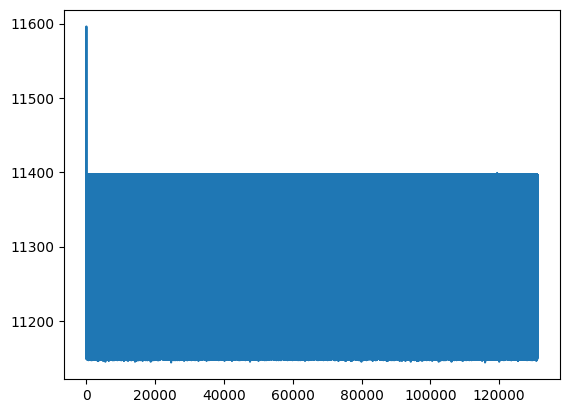

In [31]:
plt.plot(intline)
plt.show()